In [5]:
import pandas as pd
import numpy as np

1. [ ]  총인구에대한구성비(%)
1. [x]  총카페에대한구성비(%)
1. [x]  면적(㎢)
1. [ ]  인구밀도(명/㎢)
1. [x]  면적당카페수(ea/㎢)
1. [x]  인구당카페수(ea/명)
1. [x]  카페당관할인구수(명/ea)

시도명|면적당카페수|인구밀도|인구당카페수|카페당인구수
---|---|---|---|---|---|---


In [6]:
### 전국 카페수 인구 면적

In [7]:
korea_pop = pd.read_csv('./data/Cleansed_data/korea_cafe_per_pop_all.csv', encoding = 'utf-8')
korea_land = pd.read_csv('./data/Processed_data/korea_land.csv', encoding = 'utf-8')
korea_cafe = pd.read_csv('./Data/Processed_data/korea_shp_dist_def.csv', encoding = 'utf-8')

In [8]:
# 컬럼명 변경
korea_pop.rename(columns = {'Unnamed: 0':'시도명'}, inplace=True)

In [9]:
newcol = ['시도명','2016년 면적', '2017년 면적', '2018년 면적', '2019년 면적']
korea_land.columns = newcol

In [10]:
# 계 행 없애기
korea_land.drop([0], axis=0, inplace=True)

In [11]:
# 지역명 가나다 순
tmp = korea_land.sort_values(by=['시도명'])

In [12]:
# 기존인덱스 버리기
korea_land = tmp.reset_index(drop=True)

In [13]:
# 서울특별시->서울
korea_pop['시도명']=korea_land['시도명']

In [14]:
korea_pop_land = korea_pop.merge(korea_land, left_on='시도명', right_on='시도명')
korea_pop_land.head(2)

,시도명,2016년 카페수,2017년 카페수,2018년 카페수,2019년 카페수,2016인구당카페수(ea/명),2017인구당카페수(ea/명),2018인구당카페수(ea/명),2019인구당카페수(ea/명),2016카페당관할인구수(명/ea),2017카페당관할인구수(명/ea),2018카페당관할인구수(명/ea),2019카페당관할인구수(명/ea),2016년 면적,2017년 면적,2018년 면적,2019년 면적
0,강원,2289,3241,3662,3938,0.001476,0.002091,0.002373,0.002555,677.503713,478.291268,421.368651,391.442864,"16,826.40","16,827.10","16,827.80","16,827.90"
1,경기,12613,17596,20154,22225,0.000992,0.001367,0.001541,0.001679,1008.228019,731.637588,648.861417,595.710506,"10,175.30","10,183.50","10,186.60","10,187.80"


In [15]:
newcol=['시도명',                   
'카페수',
'카페수',
'카페수',
'카페수',
'인구당카페수(ea/명)',
'인구당카페수(ea/명)',
'인구당카페수(ea/명)',
'인구당카페수(ea/명)',
'카페당관할인구수(명/ea)',
'카페당관할인구수(명/ea)',
'카페당관할인구수(명/ea)',
'카페당관할인구수(명/ea)',
'면적',
'면적',
'면적',
'면적'
]
korea_pop_land.columns=newcol
korea_pop_land.head(2)

,시도명,카페수,카페수,카페수,카페수,인구당카페수(ea/명),인구당카페수(ea/명),인구당카페수(ea/명),인구당카페수(ea/명),카페당관할인구수(명/ea),카페당관할인구수(명/ea),카페당관할인구수(명/ea),카페당관할인구수(명/ea),면적,면적,면적,면적
0,강원,2289,3241,3662,3938,0.001476,0.002091,0.002373,0.002555,677.503713,478.291268,421.368651,391.442864,"16,826.40","16,827.10","16,827.80","16,827.90"
1,경기,12613,17596,20154,22225,0.000992,0.001367,0.001541,0.001679,1008.228019,731.637588,648.861417,595.710506,"10,175.30","10,183.50","10,186.60","10,187.80"


In [16]:
# 년도별로 나누기
korea_pop_land6=korea_pop_land.iloc[:, [0,1,5,9,13]]
korea_pop_land7=korea_pop_land.iloc[:, [0,2,6,10,14]]
korea_pop_land8=korea_pop_land.iloc[:, [0,3,7,11,15]]
korea_pop_land9=korea_pop_land.iloc[:, [0,4,8,12,16]]

In [17]:
# 년도행 붙여서 나중에 분류 용이
korea_pop_land6['년도'] = 2016
korea_pop_land7['년도'] = 2017
korea_pop_land8['년도'] = 2018
korea_pop_land9['년도'] = 2019

C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\admin\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = val

In [18]:
df1 = pd.concat([korea_pop_land6,korea_pop_land7,korea_pop_land8,korea_pop_land9],axis=0,ignore_index=True)
df1.info()
df1.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 68 entries, 0 to 67
Data columns (total 6 columns):
시도명               68 non-null object
카페수               68 non-null int64
인구당카페수(ea/명)      68 non-null float64
카페당관할인구수(명/ea)    68 non-null float64
면적                68 non-null object
년도                68 non-null int64
dtypes: float64(2), int64(2), object(2)
memory usage: 3.3+ KB


,시도명,카페수,인구당카페수(ea/명),카페당관할인구수(명/ea),면적,년도
0,강원,2289,0.001476,677.503713,"16,826.40",2016
1,경기,12613,0.000992,1008.228019,"10,175.30",2016


### 피봇으로 sum, count -> 년도당 시도별 총 카페수

In [19]:
cafe_cnt = pd.pivot_table(df1, index=['년도'], values='카페수', aggfunc = 'sum')

In [20]:
df2 = pd.merge(df1, cafe_cnt, left_on="년도", right_index=True)
df2.head(2)

,시도명,카페수_x,인구당카페수(ea/명),카페당관할인구수(명/ea),면적,년도,카페수_y
0,강원,2289,0.001476,677.503713,"16,826.40",2016,57855
1,경기,12613,0.000992,1008.228019,"10,175.30",2016,57855


In [21]:
df2.rename(columns = {'카페수_x':'시도별카페수(ea)', '카페수_y':'총카페수(ea)'}, inplace=True)

### object type -> int/float 으로 바꾸기
- 콤마를 먼저 없애고 object를 숫자로 바꾼다
    - result['면적'].str.replace(',', '')
    - astype({'col1': 'int32'})
    - to_numeric

In [22]:
df2['면적']=df2['면적'].str.replace(',','')

In [23]:
df2['면적']=df2['면적'].astype('float')
df2.dtypes

시도명                object
시도별카페수(ea)          int64
인구당카페수(ea/명)      float64
카페당관할인구수(명/ea)    float64
면적                float64
년도                  int64
총카페수(ea)            int64
dtype: object

### 계산하는 컬럼 준비 -> 계산하기


In [24]:
df2['면적당카페수(ea/㎢)']=  df2['시도별카페수(ea)']/df2['면적']

In [25]:
df2['총카페에대한구성비(%)'] = df2['시도별카페수(ea)']/df2['총카페수(ea)']*100

In [26]:
df2.head(2)

,시도명,시도별카페수(ea),인구당카페수(ea/명),카페당관할인구수(명/ea),면적,년도,총카페수(ea),면적당카페수(ea/㎢),총카페에대한구성비(%)
0,강원,2289,0.001476,677.503713,16826.4,2016,57855,0.136036,3.956443
1,경기,12613,0.000992,1008.228019,10175.3,2016,57855,1.239570,21.801054


In [27]:
# df3 = df2.set_index(['년도', '시도명'])
# df3.corr()

In [28]:
df3 = pd.pivot_table(df2, index=['시도명','년도'])

### pct_change()
- 컬럼의 증감율 구하기
    - df3['전년도대비카페증감율(%)'] = df3['시도별카페수(ea)'].pct_change()

In [29]:
df3['전년도대비카페증감율(%)'] = 0
df3.head(2)

면적  면적당카페수(ea/㎢)  시도별카페수(ea)  인구당카페수(ea/명)  총카페수(ea)  \
시도명 년도                                                                
강원  2016  16826.4      0.136036        2289      0.001476     57855   
    2017  16827.1      0.192606        3241      0.002091     76477   

          총카페에대한구성비(%)  카페당관할인구수(명/ea)  전년도대비카페증감율(%)  
시도명 년도                                                 
강원  2016      3.956443      677.503713              0  
    2017      4.237875      478.291268              0

In [30]:
for i in range(0, len(df3)):
    if i%4 == 0:
        # 2016년도에 대하여 계산을 수행하지 않음. (2015년 자료 없으므로). 0을 기입
        pass
    else:
        # 카페수에 대하여 (당년도-전년도)/전년도 *100
        df3.iloc[i,-1]=(df3.iloc[i, 2]-df3.iloc[i-1, 2])/df3.iloc[i-1, 2]*100   

In [31]:
df3_yearcol = df3.pivot_table(index=["시도명"], columns=['년도'])

In [34]:
df4 = df3.drop(columns=['면적', '총카페수(ea)', '시도별카페수(ea)'])

In [35]:
df4.corr()

,면적당카페수(ea/㎢),인구당카페수(ea/명),총카페에대한구성비(%),카페당관할인구수(명/ea),전년도대비카페증감율(%)
면적당카페수(ea/㎢),1.000000,-0.037840,0.539403,-0.014179,-0.014638
인구당카페수(ea/명),-0.037840,1.000000,-0.138190,-0.911153,0.110114
총카페에대한구성비(%),0.539403,-0.138190,1.000000,0.073512,-0.054267
카페당관할인구수(명/ea),-0.014179,-0.911153,0.073512,1.000000,-0.206254
전년도대비카페증감율(%),-0.014638,0.110114,-0.054267,-0.206254,1.000000


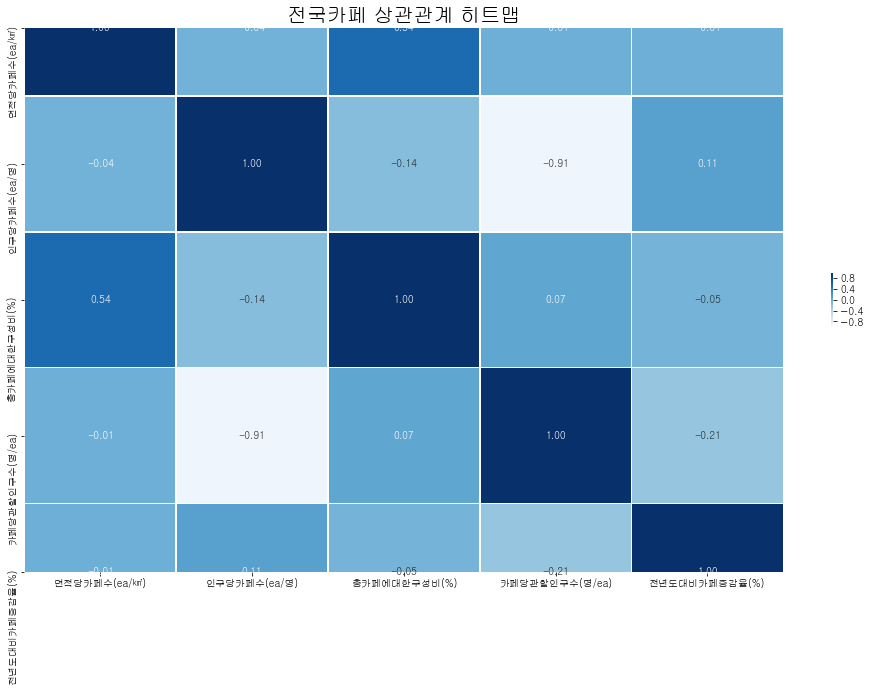

In [36]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='Gulim')


## heatmap 그리기 ##
plt.figure(figsize=(17,10))
ax = sns.heatmap(df4.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues',  cbar_kws={"shrink": .1}, vmin = -1,vmax = 1 )
plt.xlabel('', fontsize=10)
plt.ylabel('', fontsize=10)
plt.title('전국카페 상관관계 히트맵', fontsize=20)
plt.show() 

### 자료들 Export 하기

In [37]:
plt.savefig('korea_cafe_corr.png')
ax.figure.savefig('./data/Staging_table/korea_cafe_corr.png')
df3.to_csv(        './data/Staging_table/korea_cafe_yearidx.csv', encoding = 'utf-8')
df3_yearcol.to_csv('./data/Staging_table/korea_cafe_yearcol.csv', encoding = 'utf-8')
df4.to_csv(        './data/Staging_table/korea_cafe_corr.csv', encoding = 'utf-8')

<Figure size 432x288 with 0 Axes>

### 커피 수출입 량, 금액 df 가져오기

In [92]:
ori_trade=pd.read_csv('./data/Staging_table/korea_coffee_trade.csv', encoding = 'utf-8')

In [93]:
ori_trade.rename(columns={'기간':'년도'}, inplace=True)
trade_all = ori_trade.drop(['품목명'], axis=1)

### mean, max, scale 구하기
1. df2['면적']=df2['면적'].str.replace(',','')
1. df2['면적']=df2['면적'].astype('float')


In [94]:
trade_all['수출금액']=trade_all['수출금액'].str.replace(',','')
trade_all['수출중량']=trade_all['수출중량'].str.replace(',','')
trade_all['수입금액']=trade_all['수입금액'].str.replace(',','')
trade_all['수입중량']=trade_all['수입중량'].str.replace(',','')
df5 = trade_all.astype('float')

### 증감 추이 구하기
- df3['전년도대비카페증감율(%)'] = df3['시도별카페수(ea)'].pct_change()

In [95]:
newcol = ['년도',
'수출중량증감율(%)',
'수입중량증감율(%)',
'수입금액증감율(%)',
'수입금액증감율(%)']
df6 = df5.pct_change()
df6.columns=newcol

In [96]:
df6 = df6.iloc[:,1:]

In [97]:
df5=pd.concat([df5,df6], axis=1)
df5.tail()

,년도,수출중량,수입중량,수출금액,수입금액,수출중량증감율(%),수입중량증감율(%),수입금액증감율(%),수입금액증감율(%)
15,2015.0,344.9,137794.6,4199.0,547094.0,-0.240308,0.030379,-0.069783,0.037558
16,2016.0,410.1,153029.5,3323.0,562774.0,0.189040,0.110562,-0.208621,0.028661
17,2017.0,498.1,159309.3,3752.0,655344.0,0.214582,0.041037,0.129100,0.164489
18,2018.0,419.8,158385.4,4776.0,637288.0,-0.157197,-0.005799,0.272921,-0.027552
19,2019.0,590.1,167653.7,4050.0,661673.0,0.405669,0.058517,-0.152010,0.038264


In [98]:
df5.to_csv('./data/Staging_table/korea_coffee_trade_pct.csv', encoding = 'utf-8')

In [99]:
# df3_trade = df3_trade.drop(columns=['면적', '총카페수(ea)', '시도별카페수(ea)'])

In [100]:
# 인덱스 정하기
df5['년도'] = df5['년도'].astype('int16')
df5.set_index('년도', inplace=True,drop=True)
df5.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20 entries, 2000 to 2019
Data columns (total 8 columns):
수출중량          20 non-null float64
수입중량          20 non-null float64
수출금액          20 non-null float64
수입금액          20 non-null float64
수출중량증감율(%)    19 non-null float64
수입중량증감율(%)    19 non-null float64
수입금액증감율(%)    19 non-null float64
수입금액증감율(%)    19 non-null float64
dtypes: float64(8)
memory usage: 1.4 KB


In [101]:
# trade = df5.iloc[16:,4:]
trade = df5.iloc[16:,:4]
trade

,수출중량,수입중량,수출금액,수입금액
년도,,,,
2016,410.1,153029.5,3323.0,562774.0
2017,498.1,159309.3,3752.0,655344.0
2018,419.8,158385.4,4776.0,637288.0
2019,590.1,167653.7,4050.0,661673.0


In [102]:
# # 스케일
# df -= df.min()  # equivalent to df = df - df.min()
# df /= df.max()  # equivalent to df = df / df.max()
# df

### 증감추이 합치기

In [103]:
df3.info()
df3.head()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 68 entries, (강원, 2016) to (충북, 2019)
Data columns (total 8 columns):
면적                68 non-null float64
면적당카페수(ea/㎢)      68 non-null float64
시도별카페수(ea)        68 non-null int64
인구당카페수(ea/명)      68 non-null float64
총카페수(ea)          68 non-null int64
총카페에대한구성비(%)      68 non-null float64
카페당관할인구수(명/ea)    68 non-null float64
전년도대비카페증감율(%)     68 non-null float64
dtypes: float64(6), int64(2)
memory usage: 7.4+ KB


면적  면적당카페수(ea/㎢)  시도별카페수(ea)  인구당카페수(ea/명)  총카페수(ea)  \
시도명 년도                                                                
강원  2016  16826.4      0.136036        2289      0.001476     57855   
    2017  16827.1      0.192606        3241      0.002091     76477   
    2018  16827.8      0.217616        3662      0.002373     87370   
    2019  16827.9      0.234016        3938      0.002555     96104   
경기  2016  10175.3      1.239570       12613      0.000992     57855   

          총카페에대한구성비(%)  카페당관할인구수(명/ea)  전년도대비카페증감율(%)  
시도명 년도                                                 
강원  2016      3.956443      677.503713       0.000000  
    2017      4.237875      478.291268      41.590214  
    2018      4.191370      421.368651      12.989818  
    2019      4.097644      391.442864       7.536865  
경기  2016     21.801054     1008.228019       0.000000

In [104]:
# trade와 df3 합치기
df3_trade = pd.merge(df3,trade, left_index =True, right_index=True )

In [105]:
df3_trade.head()

면적  면적당카페수(ea/㎢)  시도별카페수(ea)  인구당카페수(ea/명)  총카페수(ea)  \
시도명 년도                                                                
강원  2016  16826.4      0.136036        2289      0.001476     57855   
    2017  16827.1      0.192606        3241      0.002091     76477   
    2018  16827.8      0.217616        3662      0.002373     87370   
    2019  16827.9      0.234016        3938      0.002555     96104   
경기  2016  10175.3      1.239570       12613      0.000992     57855   

          총카페에대한구성비(%)  카페당관할인구수(명/ea)  전년도대비카페증감율(%)   수출중량      수입중량  \
시도명 년도                                                                   
강원  2016      3.956443      677.503713       0.000000  410.1  153029.5   
    2017      4.237875      478.291268      41.590214  498.1  159309.3   
    2018      4.191370      421.368651      12.989818  419.8  158385.4   
    2019      4.097644      391.442864       7.536865  590.1  167653.7   
경기  2016     21.801054     1008.228019       0.000000  410.1  153029.5   

            수출금액      수입금액  
시도명 년도                      
강원  2016  3323.0  562774.0  
    2017  3752.0  655344.0  
    2018  4776.0  637288.0  
    2019  4050.0  661673.0  
경기  2016  3323.0  562774.0

In [106]:
df2.head()

,시도명,시도별카페수(ea),인구당카페수(ea/명),카페당관할인구수(명/ea),면적,년도,총카페수(ea),면적당카페수(ea/㎢),총카페에대한구성비(%)
0,강원,2289,0.001476,677.503713,16826.4,2016,57855,0.136036,3.956443
1,경기,12613,0.000992,1008.228019,10175.3,2016,57855,1.239570,21.801054
2,경남,4025,0.001193,838.228820,10538.8,2016,57855,0.381922,6.957048
3,경북,3570,0.001322,756.414006,19030.7,2016,57855,0.187592,6.170599
4,광주,1577,0.001073,931.651237,501.2,2016,57855,3.146449,2.725780


In [107]:
df2_trade = pd.merge(df2,trade, left_on ="년도", right_index=True )

In [108]:
df2_trade.head()

,시도명,시도별카페수(ea),인구당카페수(ea/명),카페당관할인구수(명/ea),면적,년도,총카페수(ea),면적당카페수(ea/㎢),총카페에대한구성비(%),수출중량,수입중량,수출금액,수입금액
0,강원,2289,0.001476,677.503713,16826.4,2016,57855,0.136036,3.956443,410.1,153029.5,3323.0,562774.0
1,경기,12613,0.000992,1008.228019,10175.3,2016,57855,1.239570,21.801054,410.1,153029.5,3323.0,562774.0
2,경남,4025,0.001193,838.228820,10538.8,2016,57855,0.381922,6.957048,410.1,153029.5,3323.0,562774.0
3,경북,3570,0.001322,756.414006,19030.7,2016,57855,0.187592,6.170599,410.1,153029.5,3323.0,562774.0
4,광주,1577,0.001073,931.651237,501.2,2016,57855,3.146449,2.725780,410.1,153029.5,3323.0,562774.0


In [109]:
#df3_trade1 = df3_trade.drop(columns=['면적', '총카페수(ea)', '시도별카페수(ea)'])

In [110]:
# df3_trade.corr()

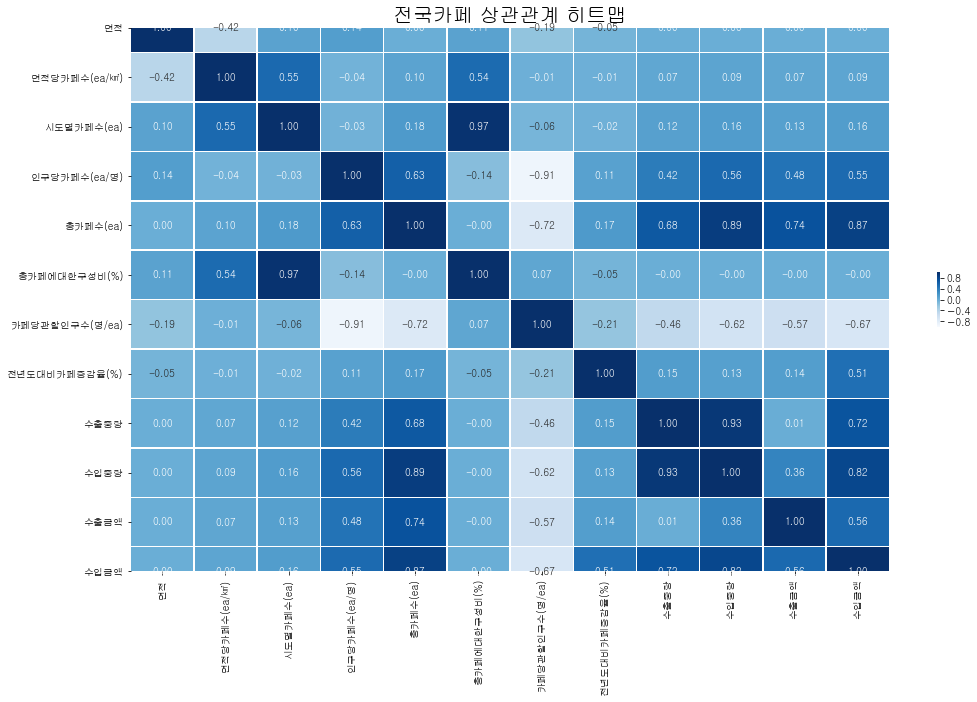

In [111]:
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.font_manager._rebuild()
mpl.pyplot.rc('font', family='Gulim')


## heatmap 그리기 ##
plt.figure(figsize=(17,10))
ax = sns.heatmap(df3_trade.corr(), annot=True, fmt = '.2f', linewidths=.5, cmap='Blues',  cbar_kws={"shrink": .1}, vmin = -1,vmax = 1 )
plt.xlabel('', fontsize=10)
plt.ylabel('', fontsize=10)
plt.title('전국카페 상관관계 히트맵', fontsize=20)
plt.show() 

### 시도별 카페수 Bar chart

In [158]:
df2_cnt=df2.iloc[:,[0,5,1]]
df2_cnt1=df2_cnt.pivot_table(index='시도명', columns='년도' )

# 인덱스 정하기
# df2_cnt.set_index('시도명', inplace=True, drop=True)
df2_cnt1

시도별카페수(ea)                     
년도        2016   2017   2018   2019
시도명                                
강원        2289   3241   3662   3938
경기       12613  17596  20154  22225
경남        4025   4903   5555   5903
경북        3570   4533   5133   5612
광주        1577   2181   2618   2850
대구        3097   3604   4202   4530
대전        2067   2656   3044   3288
부산        3291   3839   4611   4915
서울       11125  14515  16281  18742
세종         177    370    438    486
울산        1213   1470   1793   2077
인천        3071   4160   4432   4953
전남        1906   2813   3309   3588
전북        2424   3193   3715   3920
제주        1261   1691   2089   2224
충남        2466   3417   3760   4037
충북        1683   2295   2574   2816

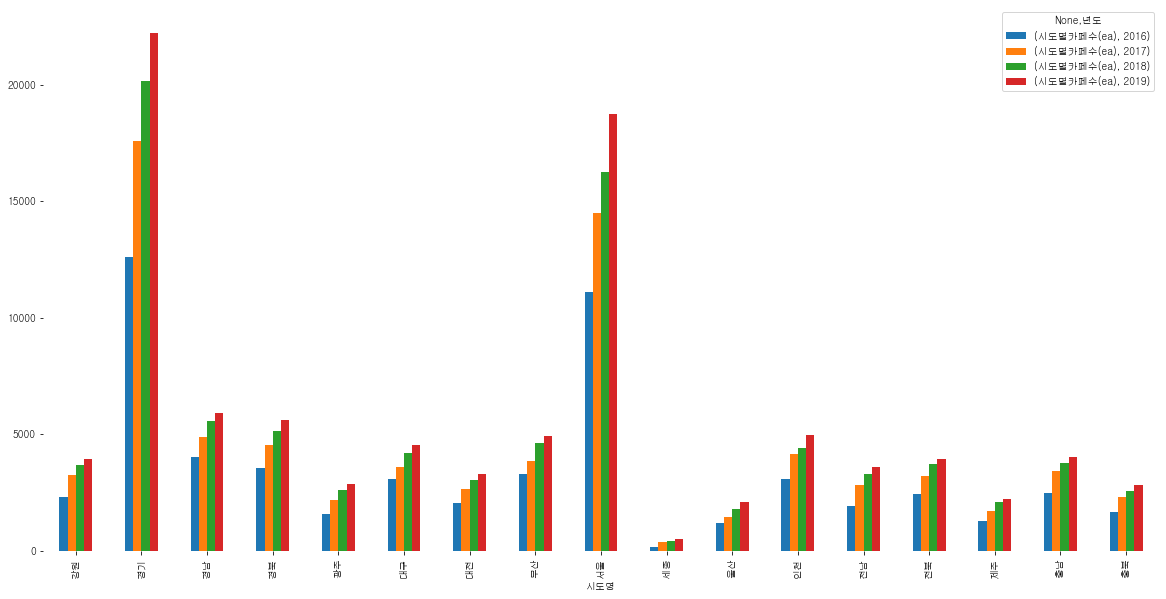

In [211]:
ax = df2_cnt1.plot(kind='bar' ,figsize=(20,10))

# 그래프 박스 없애기
plt.sca(ax)
plt.box(False)

### 그래프 위에 값 표시하기 
- ax.annotate(s, xy, *args, **kwargs) 는 그래프 안에 특정 위치에 문자열을 찍어준다.
    1. s 인자에 문자열을 넣어주면된다.
    2. xy 에는 튜플로 문자열이 들어갈 (x, y) 위치를 넣어주면 된다.
        - 위 코드에서는 (left+width/2, height*1.01) 를 주었는데, 잘 해석해보면,
        - x는 현재 막대그래프의 가운데 위치
        - y는 현재 막대그래프의 높이 위치임을 알 수 있다.
        - y*1.01 은 막대그래프의 높이보다 조금 더 높게(0.01 더 높게) 일종의 마진을 준 것이다. 바꿔도 상관없다.
    1. ha 는 짐작할 수 있듯이, horizontal align 이다. 이를 center 로 둬야, 중심축이 가운데로 온다.


In [247]:
# legend 사이즈 조정
import pylab as plot
params = {'legend.fontsize': 25,
          'legend.handlelength': 2}
plot.rcParams.update(params)

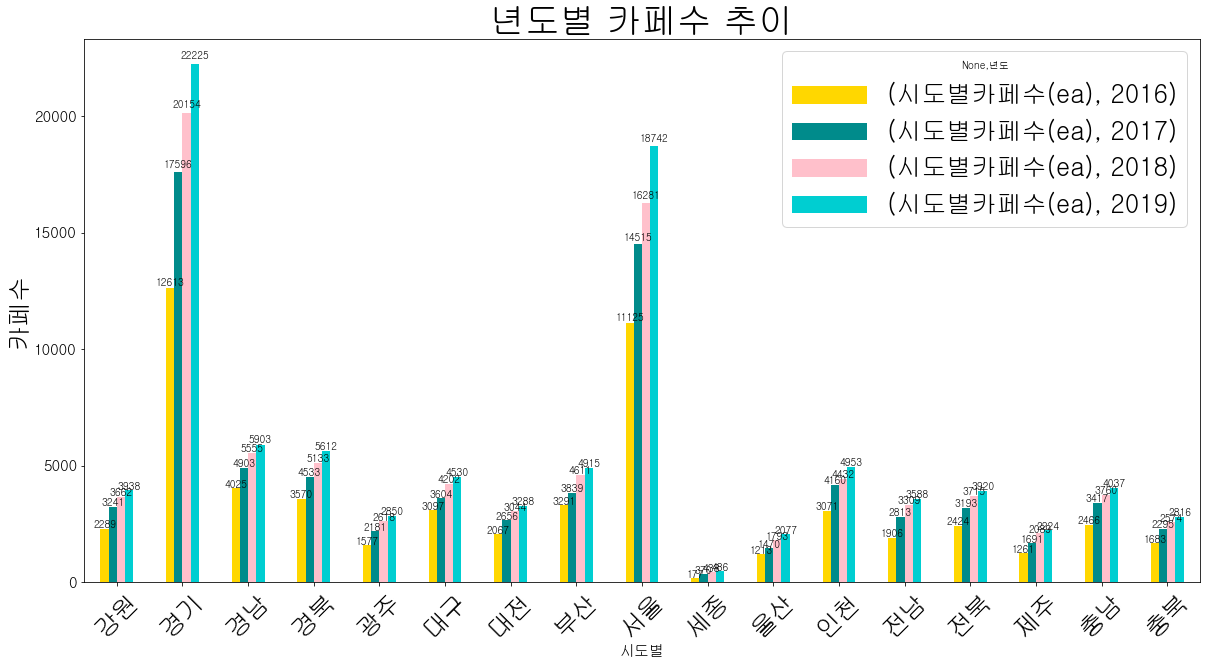

In [249]:
ax = df2_cnt1.plot(kind='bar', rot=45, colors=['gold', 'darkcyan','pink', 'darkturquoise'], figsize=(20,10))

for p in ax.patches: # 막대들을 담고 있는 리스트
    left, bottom, width, height = p.get_bbox().bounds # 해당 막대그래프의 정보 
    ax.annotate("%d"%(height), (left+width/2, height*1.01), ha='center')

   
plt.title("년도별 카페수 추이", fontsize=35)

plt.xlabel('시도별', fontsize=15)

plt.ylabel('카페수', fontsize=25)

plt.xticks( fontsize=25)
plt.yticks( fontsize=15)

plt.show()

In [250]:
ax.figure.savefig('./data/Cleansed_data/korea_cafe_cnt_bar.png')

In [239]:
df2_cnt1.to_csv('./data/Cleansed_data/korea_cafe_cnt.csv', encoding='utf-8')

### 자료 저장

In [112]:
plt.savefig('korea_cafe_corr_pct.png')
ax.figure.savefig('./data/Staging_table/korea_cafe_corr_pct.png')
df3_trade.to_csv('./data/Staging_table/korea_cafe_yearidx_pct.csv', encoding = 'utf-8')

<Figure size 432x288 with 0 Axes>

In [257]:
missing = df3.shape[0] - df3.count()
print(df3.info() , df3.shape, missing)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 68 entries, (강원, 2016) to (충북, 2019)
Data columns (total 8 columns):
면적                68 non-null float64
면적당카페수(ea/㎢)      68 non-null float64
시도별카페수(ea)        68 non-null int64
인구당카페수(ea/명)      68 non-null float64
총카페수(ea)          68 non-null int64
총카페에대한구성비(%)      68 non-null float64
카페당관할인구수(명/ea)    68 non-null float64
전년도대비카페증감율(%)     68 non-null float64
dtypes: float64(6), int64(2)
memory usage: 7.2+ KB
None (68, 8) 면적                0
면적당카페수(ea/㎢)      0
시도별카페수(ea)        0
인구당카페수(ea/명)      0
총카페수(ea)          0
총카페에대한구성비(%)      0
카페당관할인구수(명/ea)    0
전년도대비카페증감율(%)     0
dtype: int64


In [258]:
missing = df3_yearcol.shape[0] - df3_yearcol.count()
print(df3_yearcol.info() , df3_yearcol.shape, missing)

<class 'pandas.core.frame.DataFrame'>
Index: 17 entries, 강원 to 충북
Data columns (total 32 columns):
(면적, 2016)                17 non-null float64
(면적, 2017)                17 non-null float64
(면적, 2018)                17 non-null float64
(면적, 2019)                17 non-null float64
(면적당카페수(ea/㎢), 2016)      17 non-null float64
(면적당카페수(ea/㎢), 2017)      17 non-null float64
(면적당카페수(ea/㎢), 2018)      17 non-null float64
(면적당카페수(ea/㎢), 2019)      17 non-null float64
(시도별카페수(ea), 2016)        17 non-null int64
(시도별카페수(ea), 2017)        17 non-null int64
(시도별카페수(ea), 2018)        17 non-null int64
(시도별카페수(ea), 2019)        17 non-null int64
(인구당카페수(ea/명), 2016)      17 non-null float64
(인구당카페수(ea/명), 2017)      17 non-null float64
(인구당카페수(ea/명), 2018)      17 non-null float64
(인구당카페수(ea/명), 2019)      17 non-null float64
(전년도대비카페증감율(%), 2016)     17 non-null float64
(전년도대비카페증감율(%), 2017)     17 non-null float64
(전년도대비카페증감율(%), 2018)     17 non-null float64
(전년도대비카페증감율(%), 2019)     17 non-nu

In [259]:
missing = df4.shape[0] - df4.count()
print(df4.info() , df4.shape, missing)

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 68 entries, (강원, 2016) to (충북, 2019)
Data columns (total 5 columns):
면적당카페수(ea/㎢)      68 non-null float64
인구당카페수(ea/명)      68 non-null float64
총카페에대한구성비(%)      68 non-null float64
카페당관할인구수(명/ea)    68 non-null float64
전년도대비카페증감율(%)     68 non-null float64
dtypes: float64(5)
memory usage: 5.6+ KB
None (68, 5) 면적당카페수(ea/㎢)      0
인구당카페수(ea/명)      0
총카페에대한구성비(%)      0
카페당관할인구수(명/ea)    0
전년도대비카페증감율(%)     0
dtype: int64
